<a href="https://colab.research.google.com/github/jhj1819/Machine-learning/blob/main/ModelTuning1028.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1028

In [4]:
import numpy as np
import pandas as pd

In [5]:
 path = 'https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data'
 df = pd.read_csv(path, header=None)

.data로 끝나는 데이터에는 header가 없음

In [6]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


- 특성이 많다고 무조건 도움이 되는것은 아님.
- x끼리 서로 연관이 있다면 성능이 하락함

컬럼 이름을 모르니까 drop() 대신 iloc

In [7]:
X = df.iloc[:,2:]

In [8]:
X.shape

(569, 30)

pandas로 쓸 이유가 없으므로 numpy로(.values)

In [9]:
X = df.iloc[:,2:].values

In [10]:
X.shape

(569, 30)

In [11]:
y = df.iloc[:,1].values

In [12]:
y.shape

(569,)

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2,
                                                    stratify =y, random_state=1)

In [14]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

클래스 분포 파악
- pandas에서는 value_count()
- numpy에서는 unique() , return_counts=True: 개수도 알려줌

In [15]:
unique_values, counts = np.unique(y_train, return_counts=True)
print(unique_values)
print(counts) # 문제될정도의 불균형은 아님

[0 1]
[285 170]


과제2에서 정확도는 준수하지만 정밀도와 재현율은 0에 가까웠음
- 클래스 불균형의 문제
> - 적은 클래스에 가중치를 준다
> - 많은 클래스를 제거해서 균형을 맞춘다(?)

정오분류표에서 측도를 구할때 가중치를 똑같이 뒀음
- 음성을 양성으로 구분하는것과, 양성을 음성으로 구분하는것을 똑같이 여김(실제론 음성을 양성으로 구분하는게 더 중요함)

위 데이터는 특성이 매우 많음
- x는 y와 연관이 높아야함
- x끼리는 연관이 낮아야함

특성이 매우 많을때
- 좋은 특성은 남기고, 나머지는 뺌. (어렵고 복잡함)
- 모든 특성을 다 가지고, 새로운 특성을 만들어냄 -> **특성추출**
- PCA: 차원축소 : 특성추출의 대표적 알고리즘

차원이 커질수록 데이터간 거리가 멀어짐.. (희소해짐)
-> 차원축소 필요

주성분 분석
데이터를 가장 잘 설명하는 축을 뽑아냄 <- 첫번째 주성분


두번째 주성분은 첫번째 주성분과 연관이 적어야함 = (상관계수 0 , 독립적(직각)).. 직각인걸 뽑아냄.
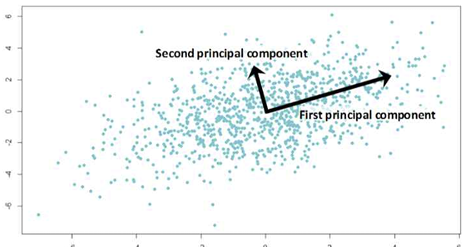

- n_components : 추출하고자 하는 주성분 개수
- explained_variance_ratio : 주성분으로 설명되는 분산의 비율
- PCA 사용시 표준화 필요

In [16]:
# 특성 표준화
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [17]:
# PCA 변환
from sklearn.decomposition import PCA
pca = PCA(n_components=2) # 주성분 2개 추출
pca.fit(X_train_std)
pca.components_ # 전치 투영 행렬, shape = (2,30)

array([[ 0.21679334,  0.10660312,  0.22557851,  0.21886594,  0.14066045,
         0.23936605,  0.25444238,  0.25775276,  0.14120408,  0.07237829,
         0.20600989,  0.01378187,  0.21367988,  0.20798454,  0.00307547,
         0.17102664,  0.14768555,  0.18439201,  0.04163771,  0.10122214,
         0.226975  ,  0.10755498,  0.23567844,  0.2237171 ,  0.12867934,
         0.21426764,  0.2282569 ,  0.24993858,  0.12582219,  0.13879824],
       [-0.23462306, -0.06849448, -0.2151757 , -0.23224295,  0.1848655 ,
         0.14475358,  0.06573624, -0.03731318,  0.18138941,  0.3662257 ,
        -0.09883883,  0.0763412 , -0.07861921, -0.15183423,  0.2049454 ,
         0.2377156 ,  0.20931191,  0.1409671 ,  0.19936217,  0.2828757 ,
        -0.22124091, -0.06136208, -0.20066026, -0.22093973,  0.15776067,
         0.13415898,  0.09876787, -0.00967411,  0.13847033,  0.26770452]])

In [18]:
pca.explained_variance_ratio_ # 처음 두 주성분으로 설명되는 분산의 비율: 총 63%
# 첫번째 주성분: 45%, 두번째 18%

array([0.45254431, 0.1855675 ])

In [19]:
# PCA 변환
X_train_std_pca = pca.transform(X_train_std)
X_test_std_pca = pca.transform(X_test_std)

In [20]:
X_train_std_pca.shape # 2차원으로 변함. (30개중 합쳐서 2개로 만들었다.)

(455, 2)

In [21]:
import matplotlib.pyplot as plt

- 30개를 가지고 로지스틱 -> 98%
- 2개를 가지고 로지스틱 -> 95%
- 30개를 가지고 만든게 더 높지만, 2개만을 가지고도 그에 준하는 성능을 보였다.

## 파이프라인

여러 변환기 or 추정기들을 모아서 한번에 하도록 할 수 있음

ex) StandardScaler -> PCA -> LogisticRegression

In [22]:
from sklearn.pipeline import make_pipeline

sklearn.compose.ColumnTransformer를 사용하면, 수치형/범주형 칼럼 이름 리스트에
대한 전처리 파이프라인 구축 가능(이런것도있더라..)

# 1030

## 모델 튜닝과 교차검증

### 모델 튜닝
= 모델 선택

- 모수를 찾는것 -> 모델 훈련
- 적절한 초모수를 찾는것 -> 모델튜닝
- 초모수의 의미를 알고 찾는것보다 이것저것.. 넣어보며
- 모형튜닝에는 검증용(validation) 데이터가 따로 필요함


#### 검증용 데이터를 만드는 방법
1. holdout방법: 훈련데이터를 진짜훈련용/검증용으로 나눠서 사용
- 훈련용 데이터가 적어지는 단점

2. 교차검증(CV):
- 대표적 방법 : k-겹 교차검증(k-fold CV):
- k개의 그룹중 k-1개를 훈련용, 1개를 검증용..
- 검증 데이터가 되는걸 돌려가며 사용 후 평균을 구함
- 모델 선택 후에는 전체 훈련데이터로 다시 훈련
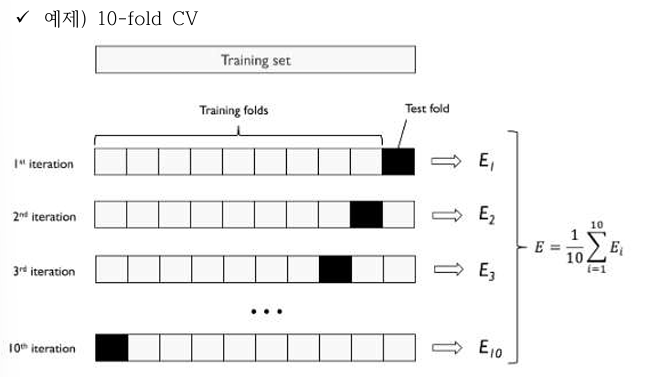

cross_val_score 함수 이용 (validation)
- cross_val_score(추정기, X, y, cv(k값), n_jobs)
- n_jobs: 사용하고자 하는 cpu 수

In [23]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression(random_state = 1)
scores = cross_val_score(logistic, X_train_std, y_train, cv=10, n_jobs=-1)
print(np.round(scores, 3))
print(np.round(np.mean(scores), 3))

[1.    0.978 1.    0.978 0.935 0.956 0.978 1.    1.    1.   ]
0.982


각각의 점수를 반환. 평균은 따로 구해줘야함

#### 규제

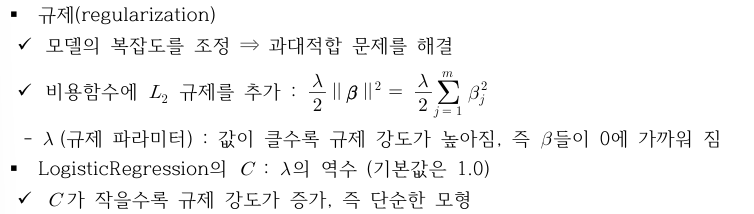

특정 베타가 커지는 것을 누를 수 있음

- L2-norm: 계수를 줄여 과대적합 막음
- L1-norm: 계수를 0으로 만들어 특정 특성 안씀
- 이 규제에 관련된 초모수가 C

C 를 조정해가며 적절한 C 찾기

In [28]:
C_list = np.logspace(-2, 2, 5)
C_list

for c in C_list:
  logistic = LogisticRegression(C = c, random_state=1)
  scores = cross_val_score(logistic, X_train_std, y_train, cv=10)
  print('C = %6.2f accuracy = %.3f' % (c, np.mean(scores)))

C =   0.01 accuracy = 0.943
C =   0.10 accuracy = 0.976
C =   1.00 accuracy = 0.982
C =  10.00 accuracy = 0.974
C = 100.00 accuracy = 0.956


GridSearchCV: 위 작업을 편하게 하게 하기 위한 메소드

인자
- estimator = 모델 이름 (위치인수라 estimator 안써됨)
- param_grid = {'c' :[0.01,0.1,1,10,100]} key = 초모수의 이름
- scoring = 성능평가 (정확도or 정밀도..)
- refit = 베스트 모델에 대하여 전체 훈련셋에 fit

cross_val_score보다 장점
- 가장 좋은 초모수 알아서 찾아줌

In [38]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

depth_grid = {'max_depth':range(1,7)}

tree_gs = GridSearchCV(estimator = DecisionTreeClassifier(random_state=1),
                       param_grid=depth_grid,
                       scoring='accuracy', cv=10, n_jobs=-1)
tree_gs.fit(X_train_std, y_train)
print(tree_gs.best_score_) # 0.9583091787439614
print(tree_gs.best_params_) # {'max_depth': 7}

0.956135265700483
{'max_depth': 6}


SVC 모형 튜닝

In [44]:
from sklearn.svm import SVC

In [45]:
p_list = [1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3]
p_list

[0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]

SVC 의 초모수 3종류
1. kernel
2. C
3. gamma

In [54]:
# linear에서는 gamma가 없으므로 .. linear버전, rbf 버전 따로만들어야함 -> 딕셔너리 리스트
grid = [{'C': p_list, 'kernel':['linear']},
        {'C': p_list, 'kernel':['rbf'], 'gamma':p_list}]

In [55]:
svc_gs = GridSearchCV(estimator = SVC(random_state=1),
                       param_grid=grid,
                      scoring='accuracy',
                      refit = True,
                      cv=5,
                      n_jobs=-1)
svc_gs.fit(X_train_std, y_train)

GridSearchCV(cv=5, estimator=SVC(random_state=1), n_jobs=-1,
             param_grid=[{'C': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0],
                          'kernel': ['linear']},
                         {'C': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0],
                          'gamma': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0],
                          'kernel': ['rbf']}],
             scoring='accuracy')

교안과의 다른점...
- 파이프라인시 누구의 파라미터인지를 구분위해 svc__ 를 붙임

In [56]:
print(svc_gs.best_score_)
print(svc_gs.best_params_)
print(svc_gs.score(X_test_std, y_test))

0.9802197802197803
{'C': 1.0, 'kernel': 'linear'}
0.9649122807017544


GridSearch 단점
- 모든 조합에 대해 계산하므로 시간 많이걸림
- 그 대안으로 RandomizedSearchCV (모든 조합 x 몇개만)

In [58]:
best_logistic = LogisticRegression(C = 1.0, random_state=1)
best_logistic.fit(X_train_std, y_train)
print("Logistic :", best_logistic.score(X_test_std, y_test))
best_tree = DecisionTreeClassifier(max_depth = 7, random_state=1)
best_tree.fit(X_train_std, y_train)
print("Tree :", best_tree.score(X_test_std, y_test))
best_svc = SVC(kernel = 'rbf', C = 100.0, gamma = 0.001, random_state=1)
best_svc.fit(X_train_std, y_train)
print("SVC :", best_svc.score(X_test_std, y_test))

Logistic : 0.9824561403508771
Tree : 0.9298245614035088
SVC : 0.9736842105263158


가장 단순한 모델이 좋은 이유..
- 유방암 데이터가 좋은 양질의 데이터이기 때문에